<a href="https://colab.research.google.com/github/nleonn/tpe-tdi/blob/main/TPE_Teor%C3%ADa_de_la_Informaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO PRACTICO ESPECIAL

## Tratamiento de los datos

### 1. Primeros Pasos

Para comenzar con la resolución en computación del trabajo comenzamos instalando gdown para descargar los archivos desde el enlace de Google Drive

In [ ]:
!pip install gdown

Descargamos los datasets correspondientes a cada ciudad para poder trabajar con los datos

In [ ]:
import gdown
from os import path

# Extraemos el ID del enlace
enlace_melbourne = '1ZRSdO3tHb_oA4TCieaunokS3srcqv2bq'
enlace_quito = '1UavCUcs6I59xc05unC9xamawLbcdX-Gu'
enlace_oslo = '1bNzPd0GEjmzpks7uWyGO6sZzkWkc15jk'

# Definimos los nombres de los archivos
archivo_melbourne = 'temperatura_Melbourne_celsius.csv'
archivo_quito = 'temperatura_Quito_celsius.csv'
archivo_oslo = 'temperatura_Oslo_celsius.csv'

# Descargamos los datos
if not path.exists(archivo_melbourne):
  print(f"Descargando {archivo_melbourne}...")
  gdown.download(id=enlace_melbourne, output=archivo_melbourne, quiet=False)
  print("Descarga completa.")
else:
  print(f"El archivo {archivo_melbourne} ya existe.")

if not path.exists(archivo_quito):
  print(f"Descargando {archivo_quito}...")
  gdown.download(id=enlace_quito, output=archivo_quito, quiet=False)
  print("Descarga completa.")
else:
  print(f"El archivo {archivo_quito} ya existe.")

if not path.exists(archivo_oslo):
  print(f"Descargando {archivo_oslo}...")
  gdown.download(id=enlace_oslo, output=archivo_oslo, quiet=False)
  print("Descarga completa.")
else:
  print(f"El archivo {archivo_oslo} ya existe.")

El archivo temperatura_Melbourne_celsius.csv ya existe.
El archivo temperatura_Quito_celsius.csv ya existe.
El archivo temperatura_Oslo_celsius.csv ya existe.


Pasamos los datos a estructuras manejables dentro de Python que son las listas, para evitar trabajar con librerías como pandas que automatizan gran parte del trabajo. Imprimimos su contenido a modo de comprobación.

In [ ]:
datos_oslo = []
datos_quito = []
datos_melbourne = []

# Definimos una conversion generica
def convertirCsvLista(lista, archivo) :
  with open(archivo, 'r') as csv:
    for linea in csv:
        campos = linea.strip().split(';')
        for campo in campos:
            try :
              lista.append(float(campo))
            except :
              print("Existe un campo que no es un flotante. Error de conversión: ", end="")
              print(campo)

# Convertimos los datos de Melbourne
convertirCsvLista(datos_melbourne, archivo_melbourne)
datos_melbourne

Existe un campo que no es un flotante. Error de conversión: AvgTemperature


[22.0,
 17.0,
 20.0,
 23.0,
 23.0,
 23.0,
 19.0,
 19.0,
 20.0,
 21.0,
 21.0,
 23.0,
 22.0,
 23.0,
 23.0,
 23.0,
 24.0,
 22.0,
 22.0,
 21.0,
 18.0,
 18.0,
 18.0,
 19.0,
 20.0,
 20.0,
 21.0,
 21.0,
 23.0,
 24.0,
 20.0,
 19.0,
 23.0,
 26.0,
 22.0,
 25.0,
 19.0,
 19.0,
 21.0,
 22.0,
 20.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 21.0,
 19.0,
 20.0,
 20.0,
 20.0,
 20.0,
 22.0,
 20.0,
 20.0,
 22.0,
 23.0,
 23.0,
 22.0,
 20.0,
 20.0,
 21.0,
 19.0,
 22.0,
 22.0,
 21.0,
 23.0,
 21.0,
 19.0,
 18.0,
 22.0,
 17.0,
 21.0,
 18.0,
 18.0,
 23.0,
 23.0,
 18.0,
 20.0,
 21.0,
 23.0,
 21.0,
 23.0,
 18.0,
 20.0,
 19.0,
 18.0,
 18.0,
 19.0,
 17.0,
 17.0,
 17.0,
 16.0,
 17.0,
 17.0,
 16.0,
 14.0,
 15.0,
 17.0,
 15.0,
 17.0,
 17.0,
 18.0,
 17.0,
 17.0,
 19.0,
 15.0,
 17.0,
 18.0,
 17.0,
 16.0,
 17.0,
 17.0,
 18.0,
 15.0,
 18.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 19.0,
 16.0,
 14.0,
 13.0,
 15.0,
 16.0,
 16.0,
 16.0,
 18.0,
 19.0,
 21.0,
 21.0,
 17.0,
 15.0,
 17.0,
 16.0,
 15.0,
 16.0,
 14.0,
 16.0,
 16.0,
 15.0,

Viendo el contenido de los datos a modo de comprobación, se ve que todos los numeros son de tipo flotante, y sin embargo, no tienen precisión. Comprobamos que las intuiciones son ciertas con la siguiente función.

In [ ]:
def hayDecimalesConPrecision(numeros):
  hay_decimales = False
  for numero in numeros :
    if not numero.is_integer():
        hay_decimales = True
        break
  return hay_decimales

# En base al resultado de la funcion decidimos.
if hayDecimalesConPrecision(datos_melbourne) :
  print("Hay decimales en los datos")
else :
  print("No hay decimales en los datos. Los casteamos a enteros")
  datos_melbourne = [ int(x) for x in datos_melbourne ]

No hay decimales en los datos. Los casteamos a enteros


Repetimos el proceso, con los otros conjuntos de datos (Oslo y Quito).

In [ ]:
# Pasamos a lista
convertirCsvLista(datos_oslo, archivo_oslo)
convertirCsvLista(datos_quito, archivo_quito)

# Imprimimos
print(datos_oslo)
print(datos_quito)

Existe un campo que no es un flotante. Error de conversión: AvgTemperature
Existe un campo que no es un flotante. Error de conversión: AvgTemperature
[-5.0, -6.0, -13.0, -15.0, -4.0, -4.0, -3.0, 0.0, -1.0, -2.0, -5.0, -7.0, -7.0, 1.0, -3.0, 2.0, 0.0, -1.0, -2.0, -2.0, 0.0, -1.0, -5.0, -10.0, -12.0, -15.0, -16.0, -15.0, -18.0, -18.0, -13.0, -1.0, -4.0, -6.0, 2.0, 1.0, 2.0, -4.0, -6.0, -5.0, -8.0, -15.0, -7.0, -2.0, 1.0, 1.0, 2.0, 0.0, -4.0, -5.0, -2.0, -2.0, -1.0, 1.0, -3.0, -6.0, -8.0, -8.0, 2.0, 1.0, -4.0, -5.0, -4.0, -7.0, -2.0, -1.0, 0.0, -3.0, -3.0, -1.0, -1.0, 1.0, -2.0, -4.0, -3.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 4.0, 4.0, 0.0, -3.0, -4.0, -3.0, -1.0, -2.0, 1.0, 3.0, 2.0, 0.0, -1.0, -2.0, 3.0, 1.0, 2.0, 1.0, -1.0, 1.0, 3.0, 4.0, 6.0, 2.0, 1.0, -2.0, 0.0, 2.0, 2.0, 2.0, 3.0, 7.0, 10.0, 5.0, 0.0, -2.0, -1.0, 0.0, 2.0, 4.0, 10.0, 10.0, 11.0, 11.0, 10.0, 9.0, 8.0, 6.0, 5.0, 3.0, 4.0, 5.0, 1.0, 1.0, 4.0, 5.0, 5.0, 6.0, 6.0, 5.0, 9.0, 8.0, 11.0, 13.0, 15.0, 15.0, 12.0, 12.0, 15.0, 14.0,

Parece ser que la conclusión es la misma que antes con Melbourne. Rápidamente podemos comprobarlo con la función creada, y hacer el casting pertinente.

In [ ]:
# Comprobamos para Oslo
if hayDecimalesConPrecision(datos_oslo) :
  print("Hay decimales en los datos de Oslo")
else :
  print("No hay decimales en los datos de Oslo. Los casteamos a enteros")
  datos_oslo = [ int(x) for x in datos_oslo ]

# Comprobamos para Quito
if hayDecimalesConPrecision(datos_quito) :
  print("Hay decimales en los datos de Quito")
else :
  print("No hay decimales en los datos de Quito. Los casteamos a enteros")
  datos_quito = [ int(x) for x in datos_quito ]

No hay decimales en los datos de Oslo. Los casteamos a enteros
No hay decimales en los datos de Quito. Los casteamos a enteros


La conclusión es la misma en todos los casos. No tiene sentido trabajar con datos de tipo flotante si es que no van a tener precisión. Se castearon todas las muestras, adecuando los datos.

### 2. Análisis de Distribución

Procedemos a analizar la distribución en busca de outliers o valores discernibles. Para esto, podemos hacer un histograma, analizando las frecuencias de cada variable entera.

Haciendo el histograma de Oslo, vemos que hay varias opciones para elegir la cantidad de bins. Una cantidad que representa bien la distribución es 40.

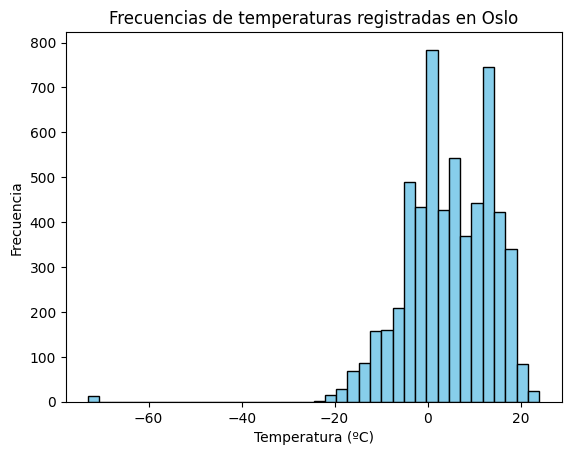

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Se define un histograma
plt.hist(datos_oslo, bins=40, color='skyblue', edgecolor='black')
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia")
plt.title("Frecuencias de temperaturas registradas en Oslo")
plt.show()

Observando el comportamiento de los datos, se ve que existen outliers. Esto es, valores extremos sin ningún sentido dentro del contexto de las temperaturas (ni en la Antártida hacen -70 ºC). Antes de trabajarlos, vemos que pasa con el resto.

Graficamos el histograma de Quito. La mejor cantidad de bins que encontramos fue 10.

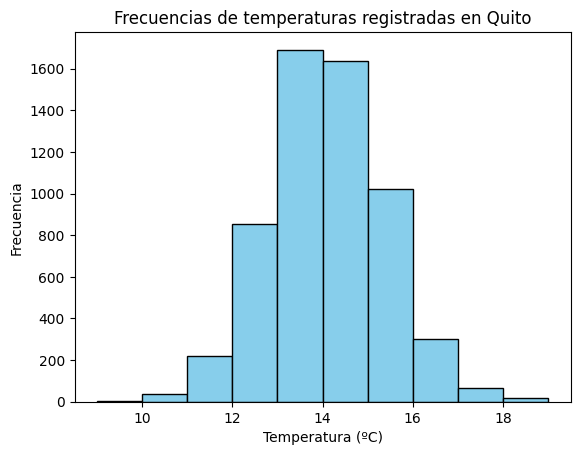

In [ ]:
# Se define un histograma
plt.hist(datos_quito, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia")
plt.title("Frecuencias de temperaturas registradas en Quito")
plt.show()

El comportamiento de la distribución muestra que las temperaturas de Quito son bastantes uniformes, es decir, que no presentan mucha variación (rango de 10 ºC). No se presentan outliers. Es acorde a lo que uno esperaría de Quito, al no tener diferencias estacionarias significativas (en el Ecuador).

Por último, Melbourne.

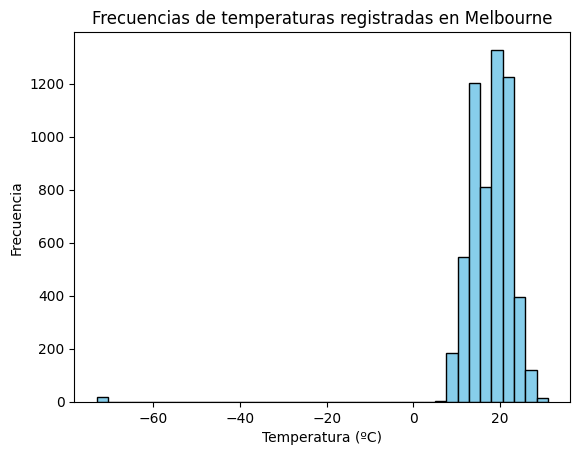

In [ ]:
# Se define un histograma
plt.hist(datos_melbourne, bins=40, color='skyblue', edgecolor='black')
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia")
plt.title("Frecuencias de temperaturas registradas en Melbourne")
plt.show()

De nuevo, ocurre algo similar con Melbourne. Una pregunta que surge de forma natural es, qué ocurre con esos valores extremos. ¿Están relacionados?.    Eliminar los extremos puede llevar a tener problemas con las correlaciones cruzadas (ocurrirían saltos temporales impredecibles). Además habría barrer todos los datos del mismo día (para trabajar con las relaciones entre los datos).  
Inputar datos con la media sesgaría las relaciones entre los datos (una temperatura podría depender de otra)

In [ ]:
knn = KNNImputer(n_neighbors=1)
df[['edad']] = knn.fit_transform(df[['edad']])

## Parte 1: Estadísticas para ingenieros que miran el cielo
Dadas las señales de temperaturas diarias registradas durante cierto periodo en las tres ciudades (S1: Quito, S2: Melbourne, S3: Oslo), expresadas como valores enteros, en °C (grados centígrados):  
1.1 Calcular la temperatura promedio y la desviación estándar para cada señal Si y analizar cómo se comportan estadísticamente.   
1.2 Calcular el factor de correlación cruzada entre cada par de señales. Discutir si existen correlaciones significativas o no (tratando de establecer, por ejemplo, si Melbourne podría estar prediciendo el clima de Quito, o de Oslo.. o si no tienen nada que ver).  

### Ejercicio 1.1

Calculamos la media y el desvio estandar de temperatura de cada ciudad.

In [ ]:
# Utilizando para la varianza la formula de V(X) = <X^2> - <X>^2
def calcularMediaDesvio(datos) :
  suma = 0
  suma_del_cuadrado = 0
  N = len(datos)
  for dato in datos :
    suma += dato
    suma_del_cuadrado += pow(dato, 2)
  varianza = suma_del_cuadrado / N - pow(suma / N, 2)
  return suma / N, pow(varianza, 0.5)

mediaOslo, desvioEstandarOslo =  calcularMediaDesvio(datos_oslo)
mediaQuito, desvioEstandarQuito =  calcularMediaDesvio(datos_quito)
mediaMelbourne, desvioEstandarMelbourne =  calcularMediaDesvio(datos_melbourne)

print("La media y el desvio estandar de temperatura de Oslo es: ", mediaOslo, " ", desvioEstandarOslo)
print("La media y el desvio estandar de temperatura de Quito es: ", mediaQuito, " ", desvioEstandarQuito)
print("La media y el desvio estandar de temperatura de Melbourne es: ", mediaMelbourne, " ", desvioEstandarMelbourne)

La media y el desvio estandar de temperatura de Oslo es:  4.611225188227242   9.460884417118809
La media y el desvio estandar de temperatura de Quito es:  13.603524982888432   1.3015790563505103
La media y el desvio estandar de temperatura de Melbourne es:  17.53388090349076   6.477099811491249


### Ejercicio 1.2

Para calcular la correlación cruzada tenemos que tener en cuenta que cada datos_osloset tiene los datos obtenidos con muestras observacionales diarias. Comprobamos que tengan el mismo tamaño.

In [ ]:
print("La cantidad de datos tomados de Oslo, Quito y Melbourne son")
print("Oslo - ", len(datos_oslo))
print("Quito - ", len(datos_quito))
print("Melbourne - ", len(datos_melbourne))

La cantidad de datos tomados de Oslo, Quito y Melbourne son
Oslo -  5844
Quito -  5844
Melbourne -  5844


Todos tienen el mismo tamaño, lo cual es un buen dato. Calculamos la matriz de correlacion cruzada distanciada por 0 unidades de tiempo:

In [ ]:
# Mapeamos cada ciudad con un numero {0:Oslo; 1:Quito; 2:Melbourne}
map_datos = [datos_oslo, datos_quito, datos_melbourne]

DISTANCIA = 0

# Función que calcula el factor de correlación entre dos muestras separas por una distancia de tiempo
def calcularFactorCorrelacionCruzada(distancia, datos_X, datos_Y) :
  N = len(datos_X)
  correlacion_cruzada = 0
  sumaX, sumaY = 0, 0
  for i in range(N - distancia) :
    correlacion_cruzada += datos_X[i] * datos_Y[i + distancia]
  correlacion_cruzada /= (N - distancia)
  mediaX, desvioX = calcularMediaDesvio(datos_X[:N - distancia])
  mediaY, desvioY = calcularMediaDesvio(datos_Y[distancia:])
  covarianza_cruzada = correlacion_cruzada - mediaX * mediaY
  factor_correlacion = covarianza_cruzada / (desvioX * desvioY)
  return factor_correlacion

# Creamos una matriz de correlacion
correlacion_cruzada = []
for i in range(3) :
  fila = []
  for j in range(3) :
    fila.append(calcularFactorCorrelacionCruzada(DISTANCIA, map_datos[i], map_datos[j]))
  correlacion_cruzada.append(fila)

Para graficar mejor la matriz de correlaciones cruzadas generada, podemos crear un mapa de calor que represente graficamente si es que hay algo que nos llame la atencion (por lo general > 0.7)

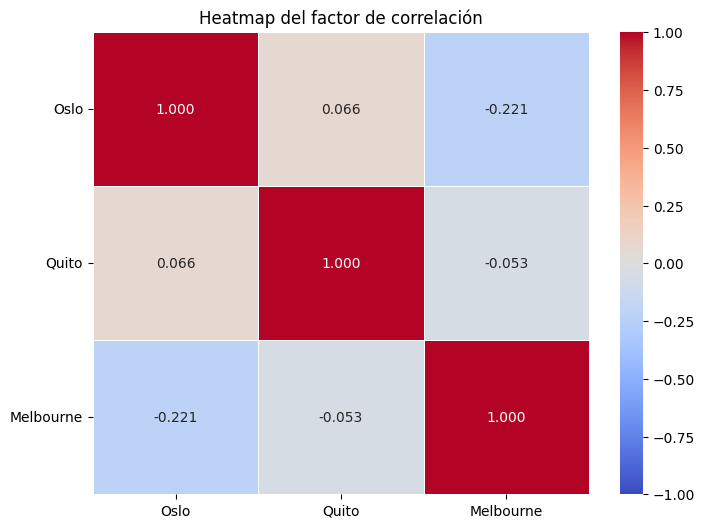

In [ ]:
import seaborn as sns

# Listas de strings para reemplazar los números
map_nombre = ["Oslo", "Quito", "Melbourne"]

# Generar el heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    correlacion_cruzada,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".3f",
    linewidths=.5,
    vmin=-1,
    vmax=1
)

# Reemplazar los números por strings en los ejes
ax.set_xticks(np.arange(3) + 0.5)
ax.set_xticklabels(map_nombre, rotation=0)
ax.set_yticks(np.arange(3) + 0.5)
ax.set_yticklabels(map_nombre, rotation=0)

# Mostramos el gráfico
plt.title("Heatmap del factor de correlación")
plt.show()

Si se quisiera analizar la variación del factor de correlación en el tiempo, habría que establecer una distancia límite a tener en cuenta. Podríamos ver cómo se comporta el indicador con tal restricción y en base a eso, determinar qué información se puede extraer.

In [ ]:
DISTANCIA_LIMITE = 1000

Calculamos la variación del factor de correlación en el tiempo para cada par de ciudades, y representamos la información en un gráfico de línea. Comenzamos con Oslo y Melbourne porque son los que presentan mayor correlación cuando la diferencia de tiempo es cero.

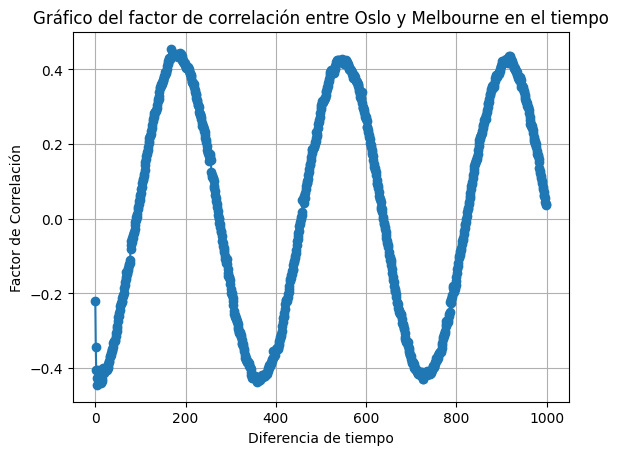

In [ ]:
factores_correlacion = []
for i in range(0, DISTANCIA_LIMITE) :
  factores_correlacion.append(calcularFactorCorrelacionCruzada(i, datos_oslo, datos_melbourne))

# Imprimimos un gráfico de línea del factor de correlación en el tiempo
plt.plot(factores_correlacion, marker='o')
plt.title('Gráfico del factor de correlación entre Oslo y Melbourne en el tiempo')
plt.xlabel('Diferencia de tiempo')
plt.ylabel('Factor de Correlación')
plt.grid(True)
plt.show()

Viendo el gráfico, tiene sentido que la variación del factor de correlación se comporte de forma "modular" (función trigonométrica) porque al fin y al cabo, existen ciclos de temperatura anuales que se repiten (por eso el período se cumple alrededor de 365). Este dato muestra, que la correlación, si bien en un principio parecía ser baja, ahora vemos que aumenta con el cambio de la distancia. Comprobamos, mirando el resto.

Analizamos entre Oslo y Quito.

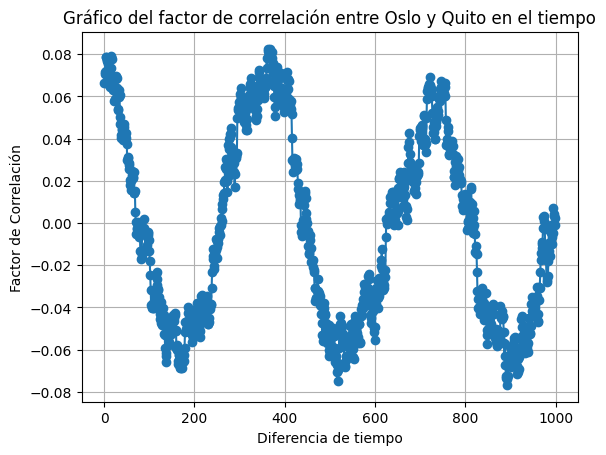

In [ ]:
factores_correlacion = []
for i in range(0, DISTANCIA_LIMITE) :
  factores_correlacion.append(calcularFactorCorrelacionCruzada(i, datos_oslo, datos_quito))

# Imprimimos un gráfico de línea del factor de correlación en el tiempo
plt.plot(factores_correlacion, marker='o')
plt.title('Gráfico del factor de correlación entre Oslo y Quito en el tiempo')
plt.xlabel('Diferencia de tiempo')
plt.ylabel('Factor de Correlación')
plt.grid(True)
plt.show()

El gráfico es menos fino que el anterior, y tampoco es muy útil que la amplitud vaya de -0.08 a 0.08. Son prácticamente independientes.

Seguimos con Quito y Melbourne.

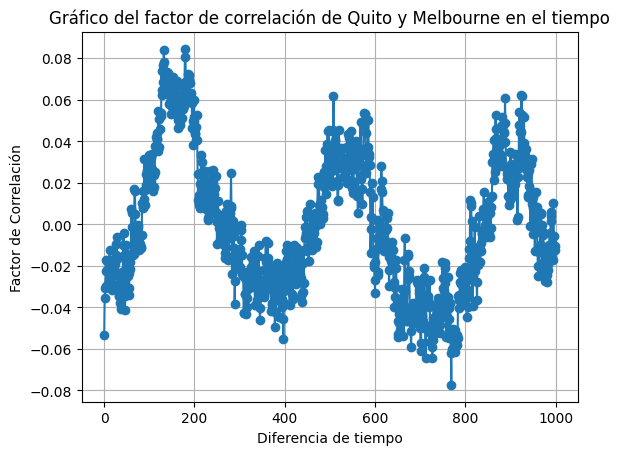

In [ ]:
factores_correlacion = []
for i in range(0, DISTANCIA_LIMITE) :
  factores_correlacion.append(calcularFactorCorrelacionCruzada(i, datos_melbourne, datos_quito))

# Imprimimos nuevamente un gráfico de línea del factor de correlación en el tiempo
plt.plot(factores_correlacion, marker='o')
plt.title('Gráfico del factor de correlación de Quito y Melbourne en el tiempo')
plt.xlabel('Diferencia de tiempo')
plt.ylabel('Factor de Correlación')
plt.grid(True)
plt.show()

Casi no se puede extraer información de acá. La función trigonométrica ahora es más difusa. Los valores en lo que oscila el factor de correlación son aproximadamente cero. Son prácticamente independientes.

Lo coherente entonces es establecer una distancia límite de 364, y volver al análisis. Hacer zoom en eso que parece relevante entre Oslo y Melbourne. El resto de relaciones no parecen significativas.

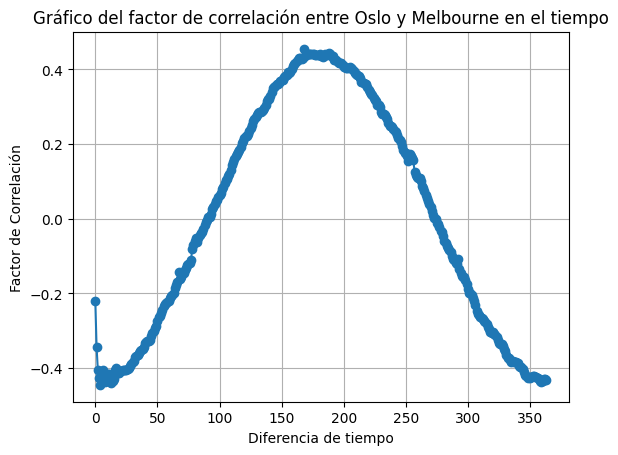

In [ ]:
DISTANCIA_LIMITE = 364

# Mismo algoritmo que antes con la diferencia del cambio en la distancia limite
factores_correlacion = []
for i in range(0, DISTANCIA_LIMITE) :
  factores_correlacion.append(calcularFactorCorrelacionCruzada(i, datos_oslo, datos_melbourne))

plt.plot(factores_correlacion, marker='o')
plt.title('Gráfico del factor de correlación entre Oslo y Melbourne en el tiempo')
plt.xlabel('Diferencia de tiempo')
plt.ylabel('Factor de Correlación')
plt.grid(True)
plt.show()

Existe una simetría entre los máximos y mínimos (la amplitud de la onda de frecuencia). Podría deberse a la ubicaciones respecto del Ecuador. Cuando en un lugar del mundo hace frío (invierno), en el otro hace calor (verano). Por eso los picos parecen distanciarse por 6 meses (182 días), ya que con esta distancia, ambos se encuentran en la misma estación.

En otros términos, tiene sentido que Oslo y Melbourne presenten cierta correlación, al fin y al cabo, ambos se encuentran en hemisferios opuestos y la Tierra es una esfera, por lo que, si se distancian medianamente similares respecto del Ecuador, podrían tener comportamientos parecidos. En este sentido, es razonbale que Quito, quién está en el Ecuador y no presenta mucha variación por su ubicación distintiva respecto de los otros dos, no tenga correlaciones significativas con ellos.

## Parte 2: Una fuente de calor… markoviana

### Ejercicio 2.1

In [ ]:
# 0 es Frio, 1 es Templado y 2 es Calor
def mapear(valor) :
  if (valor < 11) :
    return 0
  elif (valor < 19) :
    return 1
  return 2

# Funcion generica que retorna la matriz de transicion correspondiente a una entrada
def generarMatrizTransicion(datos) :
  total_transiciones = [0, 0, 0]
  matriz_transicion = [[0 for _ in range(3)] for _ in range(3)]
  valor_ant = mapear(datos[0])
  for i in range(1, len(datos)) :
    valor_act = mapear(datos[i])
    matriz_transicion[valor_act][valor_ant] += 1
    total_transiciones[valor_ant] += 1
    valor_ant = valor_act
  for i in range(3) :
    for j in range(3) :
      matriz_transicion[i][j] /= total_transiciones[j]
  return matriz_transicion

# Creamos las variables que guarden la informacion
matriz_transicion_oslo = generarMatrizTransicion(datos_oslo)
matriz_transicion_quito = generarMatrizTransicion(datos_quito)
matriz_transicion_melbourne = generarMatrizTransicion(datos_melbourne)

In [ ]:
# "mapear" devuelve 0 si es Frio, 1 si es Templado o 2 si es Calor
def generarNuevaSenial(datos) :
  mensaje = ""
  for dato in datos :
    mensaje += str(mapear(dato))
  return mensaje

T_oslo = generarNuevaSenial(datos_oslo)
T_quito = generarNuevaSenial(datos_quito)
T_melbourne = generarNuevaSenial(datos_melbourne)

### Ejercicio 2.2

In [ ]:
# Funcion generica que retorna la matriz acumulada de una matriz de probabilidades
def generarMatrizAcumulada(matriz_transicion) :
  macum = [[0 for _ in range(3)] for _ in range(3)]
  for col in range(3) :
    suma = 0
    for fil in range(3) :
      suma += matriz_transicion[fil][col]
      macum[fil][col] = suma
  return macum

# Creamos las variables que guarden la informacion
macum_oslo = generarMatrizAcumulada(matriz_transicion_oslo)
macum_quito = generarMatrizAcumulada(matriz_transicion_quito)
macum_melbourne = generarMatrizAcumulada(matriz_transicion_melbourne)

In [ ]:
from random import random

def motorMontecarlo(simbolo_ant, matriz_acumulada) :
  p = random()
  for i in range(3) :
    if p <= matriz_acumulada[i][simbolo_ant] :
      return i

In [ ]:
# Variables globales de configuracion
ERROR = 0.0001
MIN_EXPERIMENTOS = 1000000

# Simula eventos aleatorios
def converge(vector_ant, vector_act) :
  i = 0
  converge = True
  while (converge and i < 3) :
    if (abs(vector_act[i] - vector_ant[i]) > ERROR) :
      converge = False
    i += 1
  return converge

# Calculo del vector estacionario (#[1] y #[2] instrucciones asociadas a graficos de convergencia)
def calcularVectorEstacionario(matriz_acumulada) :
    vector_act = [ 0 for _ in range(3)]
    vector_ant = [-1 for _ in range(3)]
    frecuencias = [0 for _ in range(3)]
    # Variables usadas para graficar la convergencia de las variables
    componenteX = []
    componenteY = [[], [], []]
    cantidad_experimentos = 0
    s_act = motorMontecarlo(0, matriz_acumulada)
    while not converge(vector_ant, vector_act) or cantidad_experimentos < MIN_EXPERIMENTOS :
        frecuencias[s_act] += 1
        cantidad_experimentos += 1
        for i in range(3) :
            vector_ant[i] = vector_act[i]
            vector_act[i] = frecuencias[i] / cantidad_experimentos
            componenteY[i].append(vector_act[i])  #[1]
        componenteX.append(cantidad_experimentos) #[2]
        s_ant = s_act
        s_act = motorMontecarlo(s_ant, matriz_acumulada)
    return vector_act, componenteX, componenteY

# Creamos las variables que guarden la informacion
vector_estacionario_oslo, X_oslo, Y_oslo = calcularVectorEstacionario(macum_oslo)
vector_estacionario_quito, X_quito, Y_quito = calcularVectorEstacionario(macum_quito)
vector_estacionario_melbourne, X_melbourne, Y_melbourne = calcularVectorEstacionario(macum_melbourne)

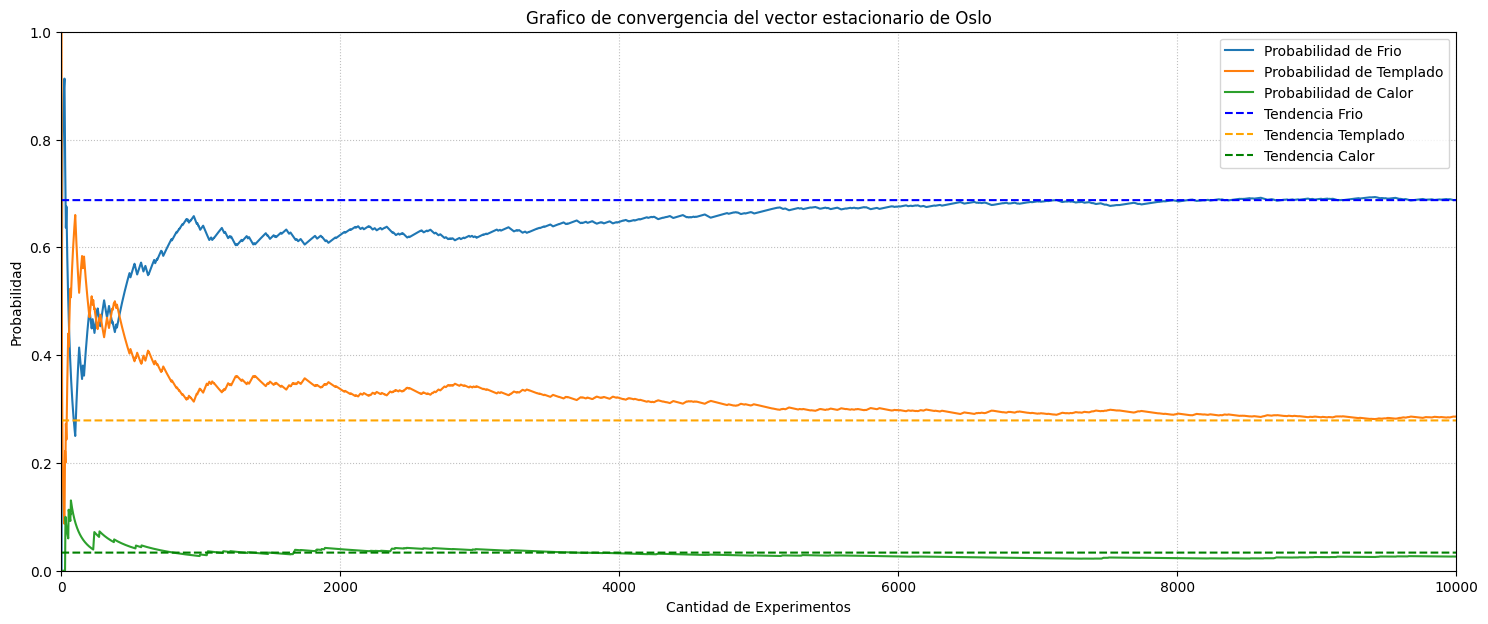

In [ ]:
# Variable global de configuracion para mostrar la cantidad limite de muestras
MAX = 10000

# Crea el gráfico de líneas
plt.figure(figsize=(18, 7))
plt.plot(X_oslo[:MAX], Y_oslo[0][:MAX], label='Probabilidad de Frio')
plt.plot(X_oslo[:MAX], Y_oslo[1][:MAX], label='Probabilidad de Templado')
plt.plot(X_oslo[:MAX], Y_oslo[2][:MAX], label='Probabilidad de Calor')

# Setea limites de los ejes
plt.xlim(0, MAX)
plt.ylim(0, 1)

# Añade titulo y etiquetas
plt.title('Grafico de convergencia del vector estacionario de Oslo')
plt.xlabel('Cantidad de Experimentos')
plt.ylabel('Probabilidad')

# Dibuja asintotas
plt.plot(X_oslo[:MAX], [vector_estacionario_oslo[0] for _ in range(MAX)], color='blue', label='Tendencia Frio', linestyle='--')
plt.plot(X_oslo[:MAX], [vector_estacionario_oslo[1] for _ in range(MAX)], color='orange', label='Tendencia Templado', linestyle='--')
plt.plot(X_oslo[:MAX], [vector_estacionario_oslo[2] for _ in range(MAX)], color='green', label='Tendencia Calor', linestyle='--')

# Muestra leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle=':', alpha=0.8)

# Muestra grafico
plt.show()

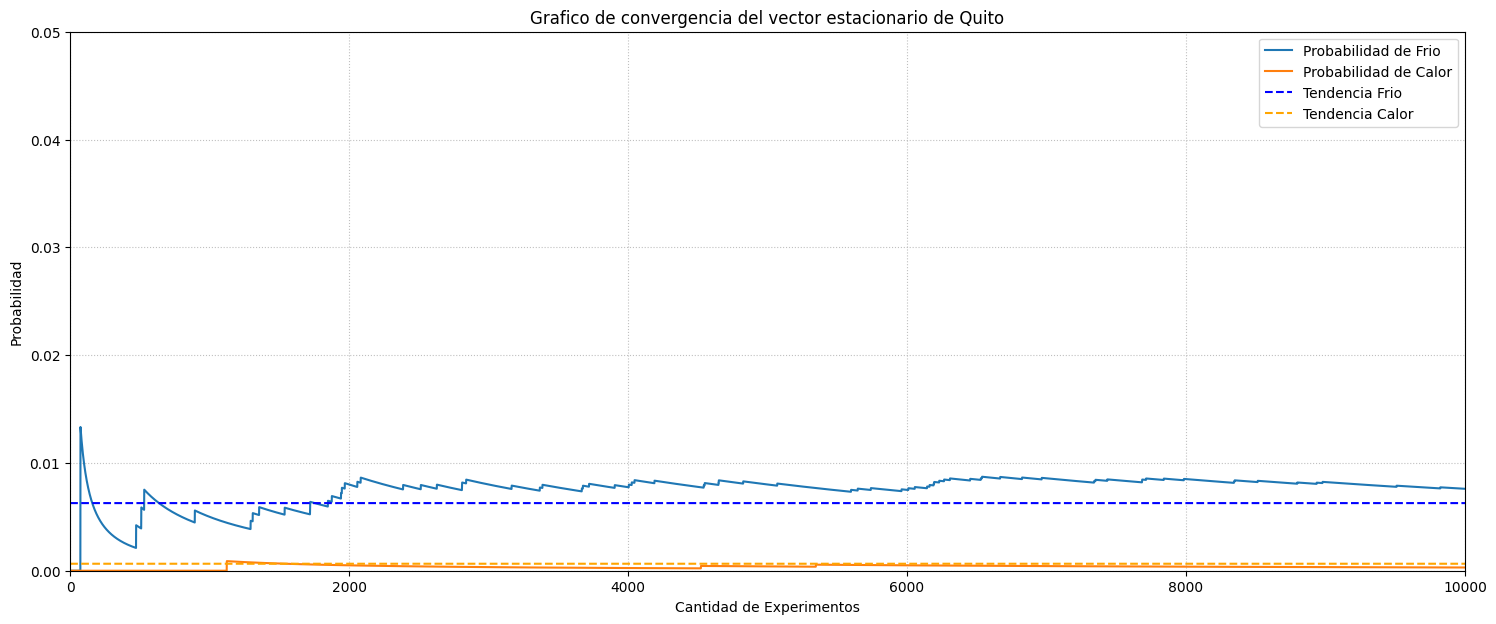

In [ ]:
# Variable global de configuracion para mostrar la cantidad limite de muestras
MAX = 10000

# Crea el gráfico de líneas
plt.figure(figsize=(18, 7))
plt.plot(X_quito[:MAX], Y_quito[0][:MAX], label='Probabilidad de Frio')
plt.plot(X_quito[:MAX], Y_quito[2][:MAX], label='Probabilidad de Calor')

# Setea limites de los ejes
plt.xlim(0, MAX)
plt.ylim(0, 0.05)

# Añade titulo y etiquetas
plt.title('Grafico de convergencia del vector estacionario de Quito')
plt.xlabel('Cantidad de Experimentos')
plt.ylabel('Probabilidad')

# Dibuja asintotas
plt.plot(X_quito[:MAX], [vector_estacionario_quito[0] for _ in range(MAX)], color='blue', label='Tendencia Frio', linestyle='--')
plt.plot(X_quito[:MAX], [vector_estacionario_quito[2] for _ in range(MAX)], color='orange', label='Tendencia Calor', linestyle='--')

# Muestra leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle=':', alpha=0.8)

# Muestra grafico
plt.show()

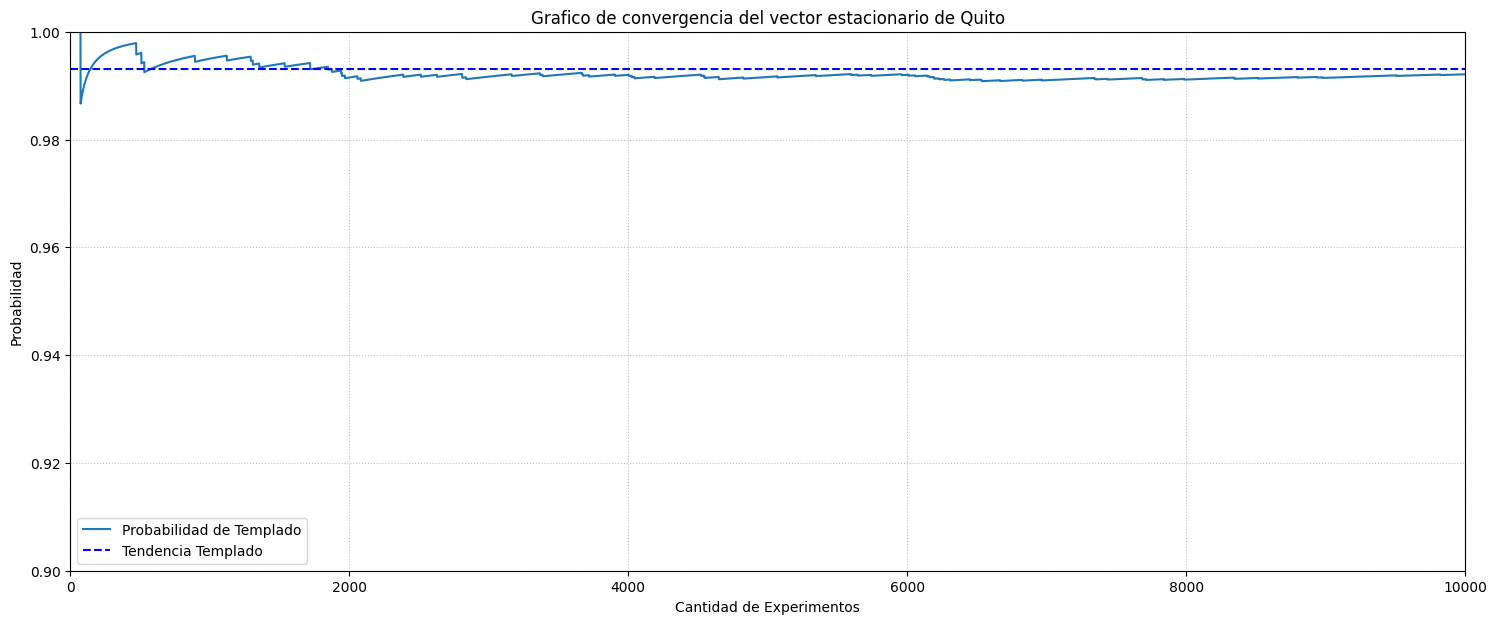

In [ ]:
# Variable global de configuracion para mostrar la cantidad limite de muestras
MAX = 10000

# Crea el gráfico de líneas
plt.figure(figsize=(18, 7))
plt.plot(X_quito[:MAX], Y_quito[1][:MAX], label='Probabilidad de Templado')

# Setea limites de los ejes
plt.xlim(0, MAX)
plt.ylim(0.9, 1)

# Añade titulo y etiquetas
plt.title('Grafico de convergencia del vector estacionario de Quito')
plt.xlabel('Cantidad de Experimentos')
plt.ylabel('Probabilidad')

# Dibuja asintotas
plt.plot(X_quito[:MAX], [vector_estacionario_quito[1] for _ in range(MAX)], color='blue', label='Tendencia Templado', linestyle='--')

# Muestra leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle=':', alpha=0.8)

# Muestra grafico
plt.show()

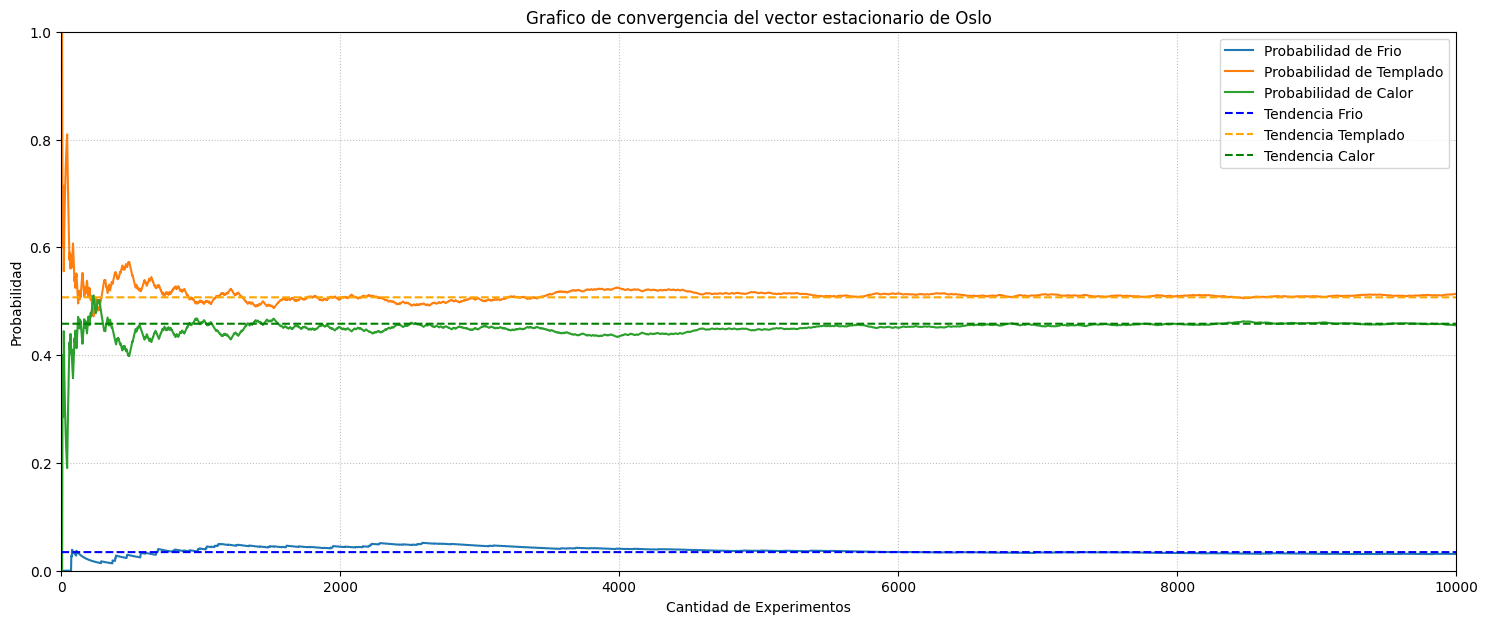

In [ ]:
# Variable global de configuracion para mostrar la cantidad limite de muestras
MAX = 10000

# Crea el gráfico de líneas
plt.figure(figsize=(18, 7))
plt.plot(X_melbourne[:MAX], Y_melbourne[0][:MAX], label='Probabilidad de Frio')
plt.plot(X_melbourne[:MAX], Y_melbourne[1][:MAX], label='Probabilidad de Templado')
plt.plot(X_melbourne[:MAX], Y_melbourne[2][:MAX], label='Probabilidad de Calor')

# Setea limites de los ejes
plt.xlim(0, MAX)
plt.ylim(0, 1)

# Añade titulo y etiquetas
plt.title('Grafico de convergencia del vector estacionario de Oslo')
plt.xlabel('Cantidad de Experimentos')
plt.ylabel('Probabilidad')

# Dibuja asintotas
plt.plot(X_melbourne[:MAX], [vector_estacionario_melbourne[0] for _ in range(MAX)], color='blue', label='Tendencia Frio', linestyle='--')
plt.plot(X_melbourne[:MAX], [vector_estacionario_melbourne[1] for _ in range(MAX)], color='orange', label='Tendencia Templado', linestyle='--')
plt.plot(X_melbourne[:MAX], [vector_estacionario_melbourne[2] for _ in range(MAX)], color='green', label='Tendencia Calor', linestyle='--')

# Muestra leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle=':', alpha=0.8)

# Muestra grafico
plt.show()

In [ ]:
def calcularMediaPasosRecurrencia(simbolo, matriz_acumulada) :
    media_act = 0
    media_ant = -1
    pasos = 0
    cantidad_experimentos = 0 # Un experimento es una recurrencia
    while abs(media_ant - media_act) > ERROR or cantidad_experimentos < MIN_EXPERIMENTOS :
        s_act = motorMontecarlo(simbolo, matriz_acumulada)
        pasos += 1
        while (s_act != simbolo) :
          s_act = motorMontecarlo(s_act, matriz_acumulada)
          pasos += 1
        cantidad_experimentos += 1
        media_ant = media_act
        media_act = pasos / cantidad_experimentos
    return media_act

print(calcularMediaPasosRecurrencia(0, macum_oslo))

1.457668


## Parte 3: Entropía, Huffman y la batalla por los bits

### Ejercicio 3.1

In [ ]:
from math import log2

def calcularEntropia(distribucion) :
  entropia = 0
  for prob in distribucion :
    if prob > 0 :
      entropia -= prob * log2(prob)
  return entropia

def calcularEntropiaCondicional(distribucion, matriz_transicion) :
  entropia_condicional = 0
  for i in range(len(matriz_transicion)) :
    entropia_condicional += distribucion[i] * calcularEntropia([fila[i] for fila in matriz_transicion])
  return entropia_condicional

def calcularEntropiaConMemoria(distribucion, matriz_transicion) :
  entropia_sin_memoria = calcularEntropia(distribucion)
  entropia_condicional = calcularEntropiaCondicional(distribucion, matriz_transicion)
  return entropia_sin_memoria + entropia_condicional

# Creamos las variables que guarden la informacion entropica SIN memoria
entropia_sin_memoria_oslo = calcularEntropia(vector_estacionario_oslo)
entropia_sin_memoria_quito = calcularEntropia(vector_estacionario_quito)
entropia_sin_memoria_melbourne = calcularEntropia(vector_estacionario_melbourne)

print(entropia_sin_memoria_oslo, " ", entropia_sin_memoria_quito, " ", entropia_sin_memoria_melbourne)

# Creamos las variables que guarden la informacion entropica CON memoria
entropia_con_memoria_oslo = calcularEntropiaConMemoria(vector_estacionario_oslo, matriz_transicion_oslo)
entropia_con_memoria_quito = calcularEntropiaConMemoria(vector_estacionario_quito, matriz_transicion_quito)
entropia_con_memoria_melbourne = calcularEntropiaConMemoria(vector_estacionario_melbourne, matriz_transicion_melbourne)

print(entropia_con_memoria_oslo, " ", entropia_con_memoria_quito, " ", entropia_con_memoria_melbourne)

1.04985639140381   0.06271090527203826   1.1802618701184244
1.43826050914466   0.12557172564872643   1.8931685392572544


### Ejercicio 3.2

In [ ]:
def comprobacionKraft(codificacion) :
    suma = 0
    for elem in codificacion :
        suma += 1/pow(2, len(elem))
    if suma == 1 :
        print("El codigo es univocamente decodificable, instantaneo y completo")

def distribucionOrdenDos(distribucion, matriz_transicion) :
  simbolos = []
  distribucion_pares = []
  for i in range(3) :
    for j in range(3) :
      prob_par = distribucion[j] * matriz_transicion[i][j]
      if prob_par > 0 :
        simbolos.append(str(i) + str(j))
        distribucion_pares.append(prob_par)
  return distribucion_pares, simbolos

def calcularCodificacionHuffman(distribucion) :
    dim = len(distribucion)
    codificaciones = [""] * dim
    probabilidades = [ [distribucion[i], i] for i in range(dim)]
    while len(probabilidades) > 1 :
        probabilidades.sort(key=lambda x: x[0], reverse=True)
        prob1 = probabilidades.pop()
        for elemento in prob1[1:] :
            codificaciones[elemento] = "0" + codificaciones[elemento]
        prob2 = probabilidades.pop()
        for elemento in prob2[1:] :
            codificaciones[elemento] = "1" + codificaciones[elemento]
        nueva_tupla = [prob1[0] + prob2[0]]
        nueva_tupla.extend(prob1[1:])
        nueva_tupla.extend(prob2[1:])
        probabilidades.append(nueva_tupla)
    return codificaciones

def verificarTeoremaShannon(longitud_media, entropia_sin_memoria, entropia_condicional, orden) :
  limite_inferior = entropia_sin_memoria/orden + (1 - 1/orden) * entropia_condicional
  limite_superior = limite_inferior + 1/orden
  longitud_por_simbolo = longitud_media/orden
  return limite_inferior < longitud_por_simbolo and longitud_por_simbolo < limite_superior

def calcularLongitudMedia(distribucion, codificacion) :
  longitud_media = 0
  for i in range(len(codificacion)) :
    longitud_media += distribucion[i] * len(codificacion[i])
  return longitud_media

# Creamos las variables que guarden la informacion entropica CON memoria
distribucion_pares_oslo, simbolos_pares_oslo = distribucionOrdenDos(vector_estacionario_oslo, matriz_transicion_oslo)
codificacion_huffman_oslo = calcularCodificacionHuffman(distribucion_pares_oslo)
comprobacionKraft(codificacion_huffman_oslo)
print(codificacion_huffman_oslo)

# Creamos las variables que guarden la informacion entropica CON memoria
distribucion_pares_quito, simbolos_pares_quito = distribucionOrdenDos(vector_estacionario_quito, matriz_transicion_quito)
codificacion_huffman_quito = calcularCodificacionHuffman(distribucion_pares_quito)
comprobacionKraft(codificacion_huffman_quito)
print(codificacion_huffman_quito)

# Creamos las variables que guarden la informacion entropica CON memoria
distribucion_pares_melbourne, simbolos_pares_melbourne = distribucionOrdenDos(vector_estacionario_melbourne, matriz_transicion_melbourne)
codificacion_huffman_melbourne = calcularCodificacionHuffman(distribucion_pares_melbourne)
comprobacionKraft(codificacion_huffman_melbourne)
print(codificacion_huffman_melbourne)

print()

longitud_media_oslo = calcularLongitudMedia(distribucion_pares_oslo, codificacion_huffman_oslo)
entropia_condicional_oslo = calcularEntropiaCondicional(vector_estacionario_oslo, matriz_transicion_oslo)
print(verificarTeoremaShannon(longitud_media_oslo, entropia_sin_memoria_oslo, entropia_condicional_oslo, 2))

longitud_media_quito = calcularLongitudMedia(distribucion_pares_quito, codificacion_huffman_quito)
entropia_condicional_quito = calcularEntropiaCondicional(vector_estacionario_quito, matriz_transicion_quito)
print(verificarTeoremaShannon(longitud_media_quito, entropia_sin_memoria_quito, entropia_condicional_quito, 2))

longitud_media_melbourne = calcularLongitudMedia(distribucion_pares_melbourne, codificacion_huffman_melbourne)
entropia_condicional_melbourne = calcularEntropiaCondicional(vector_estacionario_melbourne, matriz_transicion_melbourne)
print(verificarTeoremaShannon(longitud_media_melbourne, entropia_sin_memoria_melbourne, entropia_condicional_melbourne, 2))

El codigo es univocamente decodificable, instantaneo y completo
['1', '0010', '0011', '01', '00001', '00000', '0001']
El codigo es univocamente decodificable, instantaneo y completo
['01010', '00', '011', '1', '01011', '0100']
El codigo es univocamente decodificable, instantaneo y completo
['101001', '101010', '1010000', '101011', '0', '1011', '1010001', '100', '11']

True
True
True


### Ejercicio 3.3

In [ ]:
def obtenerCodigoAsociado(codificacion, simbolos, s1, s2) :
  i = 0
  while simbolos[i][0] != str(s1) or simbolos[i][1] != str(s2) :
    i += 1
  return codificacion[i]

# Calucla la tasa de compresion con dos asunciones:
#   1. el método usado es Huffmand de a pares
#   2. el simbolo original pesa dos bits
def calcularTasaCompresion(datos, codificacion, simbolos) :
  cantidad_datos = len(datos)
  cantidad_bits_original = cantidad_datos * 2
  cantidad_bits_comprimido = 0
  i = 0
  flag = 0
  if (cantidad_datos % 2 == 0) :
    cantidad_bits_comprimido += 2
    flag = 1
  while i < cantidad_datos - 1 - flag :
    s1 = mapear(datos[i])
    s2 = mapear(datos[i + 1])
    cantidad_bits_comprimido += len(obtenerCodigoAsociado(codificacion, simbolos, s1, s2))
    i += 2
  return cantidad_bits_original / cantidad_bits_comprimido

print(calcularTasaCompresion(datos_oslo, codificacion_huffman_oslo, simbolos_pares_oslo))

2.5425277354796605


In [ ]:
def compresionHuffmanEstatica(mensaje, simbolos, codificacion) :
    i = 0
    comprimido = ""
    simbolo_sin_comprimir = ""
    longitud_mensaje = len(mensaje)
    if (longitud_mensaje % 2 != 0) :
      simbolo_sin_comprimir = mensaje[-1]
      mensaje = mensaje[:-1]
    while i < longitud_mensaje - 1 :
        par = mensaje[i : i + 2]
        comprimido += obtenerCodigoAsociado(codificacion, simbolos, par[0], par[1])
        i += 2
    if (simbolo_sin_comprimir != "") :
      comprimido = "1" + comprimido + bin(int(simbolo_sin_comprimir))[2:].zfill(2)
    else :
      comprimido = "0" + comprimido
    return comprimido

def descompresionHuffmanEstatica(comprimido, simbolos, codificacion) :
    ultimo_simbolo = ""
    if comprimido[0] == "1" :
      ultimo_simbolo = comprimido[-2]
      comprimido = comprimido[:-2]
    comprimido = comprimido[1:]
    i = 0
    pos = 0
    mensaje = ""
    longitud_comprimido = len(comprimido)
    while i < longitud_comprimido :
      if (comprimido[pos:i + 1] in codificacion) :
        mensaje += simbolos[codificacion.index(comprimido[pos:i + 1])]
        pos = i + 1
      i += 1
    if ultimo_simbolo == "" :
      return mensaje
    return mensaje + str(int(ultimo_simbolo))

comprimido_oslo = compresionHuffmanEstatica(mensaje_oslo, simbolos_pares_oslo, codificacion_huffman_oslo)
descomprimido_oslo = descompresionHuffmanEstatica(comprimido_oslo, simbolos_pares_oslo, codificacion_huffman_oslo)

print("> ", mensaje_oslo)
print("> ", comprimido_oslo)
print("> ", descomprimido_oslo)

for i in range(len(mensaje_oslo)) :
  if mensaje_oslo[i] != descomprimido_oslo[i] :
    print("Se perdio informacion")
    break

print(len(mensaje_oslo)/len(comprimido_oslo))

>  0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000011111111111111100000111110111112221210111111111111121111111111111122222211111111211112221121111100011111111100010100000000000000000000101011000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000010010011111111111110101111111111111011111111111111111111211111111111111112111211112211111111111111000100000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000011100000000000111111111111122111111111111111112111122111211221111222221111111111122222222222222222111121221111111111111100011000101

## Parte 4: El canal climático de Musk

### Ejercicio 4.1

In [ ]:
# Extraemos el ID del enlace
enlace_Melbourne_ruidoso = '1608uqjJspK-AQk17eFdul9vu7QiPfFkV'

# Definimos el nombre del archivo
nuevo_archivo_Melbourne = 'ruido_Melbourne_celsius.csv'

# Descargamos los datos
if not path.exists(nuevo_archivo_Melbourne):
  print(f"Descargando {nuevo_archivo_Melbourne}...")
  gdown.download(id=enlace_Melbourne_ruidoso, output=nuevo_archivo_Melbourne, quiet=False)
  print("Descarga completa.")
else:
  print(f"El archivo {nuevo_archivo_Melbourne} ya existe.")

El archivo ruido_Melbourne_celsius.csv ya existe.


In [ ]:
datos_melbourne_ruidoso = []

# Convertimos los datos de Melbourne Ruidoso como antes
convertirCsvLista(datos_melbourne_ruidoso,'ruido_Melbourne_celsius.csv')
datos_melbourne_ruidoso

Existe un campo que no es un flotante. Error de conversión: AvgTemperature


[26.0,
 14.0,
 17.0,
 25.0,
 28.0,
 23.0,
 19.0,
 21.0,
 20.0,
 26.0,
 20.0,
 19.0,
 21.0,
 28.0,
 27.0,
 23.0,
 24.0,
 19.0,
 17.0,
 16.0,
 19.0,
 14.0,
 18.0,
 24.0,
 20.0,
 21.0,
 18.0,
 17.0,
 22.0,
 19.0,
 20.0,
 24.0,
 26.0,
 27.0,
 24.0,
 25.0,
 21.0,
 23.0,
 18.0,
 21.0,
 24.0,
 27.0,
 26.0,
 22.0,
 21.0,
 17.0,
 19.0,
 23.0,
 15.0,
 23.0,
 18.0,
 25.0,
 18.0,
 22.0,
 20.0,
 21.0,
 19.0,
 24.0,
 21.0,
 24.0,
 19.0,
 26.0,
 18.0,
 20.0,
 27.0,
 23.0,
 26.0,
 23.0,
 20.0,
 13.0,
 17.0,
 15.0,
 21.0,
 14.0,
 17.0,
 22.0,
 28.0,
 23.0,
 23.0,
 19.0,
 22.0,
 17.0,
 23.0,
 23.0,
 22.0,
 17.0,
 17.0,
 23.0,
 24.0,
 20.0,
 18.0,
 22.0,
 13.0,
 22.0,
 20.0,
 19.0,
 13.0,
 17.0,
 18.0,
 12.0,
 20.0,
 12.0,
 23.0,
 22.0,
 16.0,
 19.0,
 13.0,
 17.0,
 21.0,
 12.0,
 16.0,
 22.0,
 18.0,
 19.0,
 14.0,
 14.0,
 16.0,
 16.0,
 23.0,
 18.0,
 20.0,
 23.0,
 19.0,
 14.0,
 9.0,
 11.0,
 12.0,
 15.0,
 18.0,
 15.0,
 21.0,
 19.0,
 21.0,
 20.0,
 10.0,
 12.0,
 21.0,
 17.0,
 19.0,
 17.0,
 15.0,
 13.0,
 20.0,


In [ ]:
imprimirDecimalesConPrecision(datos_melbourne_ruidoso)

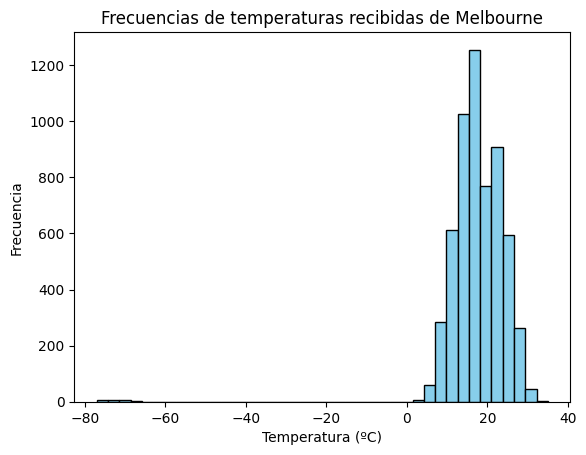

In [ ]:
# Casteamos a entero
datos_melbourne_ruidoso = [int(x) for x in datos_melbourne_ruidoso]

# Se define un histograma
plt.hist(datos_melbourne_ruidoso, bins=40, color='skyblue', edgecolor='black')
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia")
plt.title("Frecuencias de temperaturas recibidas de Melbourne")
plt.show()

### Ejercicio 4.2

In [ ]:
T_melbourne_r = generarNuevaSenial(datos_melbourne_ruidoso)

def generarMatrizCanal(entrada, salida) :
  total_transiciones = [0, 0, 0]
  matriz_transicion = [[0 for _ in range(3)] for _ in range(3)]
  for i in range(1, len(entrada)) :
    valor_ant = int(entrada[i])
    valor_act = int(salida[i])
    matriz_transicion[valor_act][valor_ant] += 1
    total_transiciones[valor_ant] += 1
  for i in range(3) :
    for j in range(3) :
      matriz_transicion[i][j] /= total_transiciones[j]
  return matriz_transicion

matriz_canal = generarMatrizCanal(T_melbourne, T_melbourne_r)
matriz_canal

[[0.61, 0.13966858302333446, 0.0],
 [0.39, 0.6746702739262767, 0.24311243484735667],
 [0.0, 0.18566114305038892, 0.7568875651526433]]

In [ ]:
ruido = calcularEntropiaCondicional(vector_estacionario_melbourne, matriz_canal)
print(ruido)

def calcularDistribucionSalida(matriz_izq, matriz_der) :
  resultado = [ 0 for _ in range(len(matriz_izq)) ]
  for i in range(len(matriz_izq)) :
    for j in range(len(matriz_izq)) :
      resultado[i] += matriz_izq[i][j] * matriz_der[j]
  return resultado

distribucion_salida = calcularDistribucionSalida(matriz_canal, vector_estacionario_melbourne)
print(distribucion_salida)

informacion_mutua = calcularEntropia(distribucion_salida) - ruido
print(informacion_mutua)

1.0242406081030575
[0.09190213337842408, 0.467084665659461, 0.44101320096211494]
0.3261044711208694
